In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [8]:
img = cv2.imread('dog.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [9]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
print(np.transpose(hist))

[[ 142.   60.   83.  112.  124.  127.  149.  151.  142.  151.  139.  147.
   110.  118.  134.  153.  130.  151.  122.  141.  138.  138.  131.  138.
   157.  122.  155.  139.  142.  124.  151.  137.  158.  167.  138.  158.
   178.  186.  169.  212.  210.  182.  222.  195.  214.  225.  237.  274.
   260.  296.  288.  320.  321.  354.  331.  355.  372.  367.  408.  430.
   428.  478.  486.  488.  510.  530.  577.  578.  601.  584.  643.  666.
   698.  721.  745.  791.  728.  831.  903.  901.  958.  975. 1039. 1065.
  1072. 1168. 1243. 1182. 1272. 1235. 1297. 1432. 1314. 1465. 1506. 1524.
  1545. 1612. 1670. 1605. 1721. 1733. 1739. 1784. 1829. 1882. 1944. 1905.
  1910. 2014. 2063. 2039. 2065. 2099. 2106. 2127. 2120. 2156. 2095. 2163.
  2093. 2133. 2178. 2126. 2198. 2160. 2253. 2198. 2134. 2165. 2124. 2218.
  2162. 2109. 2137. 2117. 2136. 2027. 2048. 2115. 2087. 2154. 2114. 2118.
  2175. 2079. 2063. 2161. 2160. 2159. 2111. 2148. 2150. 2174. 2131. 2175.
  2164. 2091. 2160. 2369. 2245. 2283. 

In [5]:
hist = np.bincount(img.ravel(),minlength=256)

In [6]:
from matplotlib import pyplot as plt

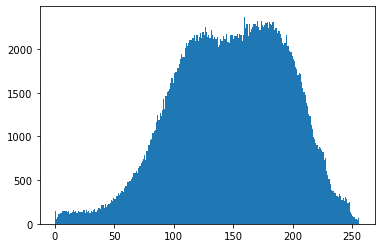

In [7]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

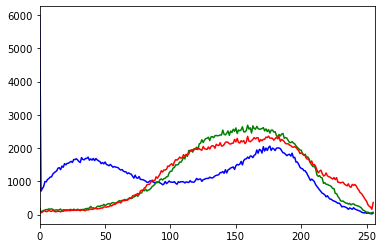

In [11]:
img = cv2.imread('dog.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

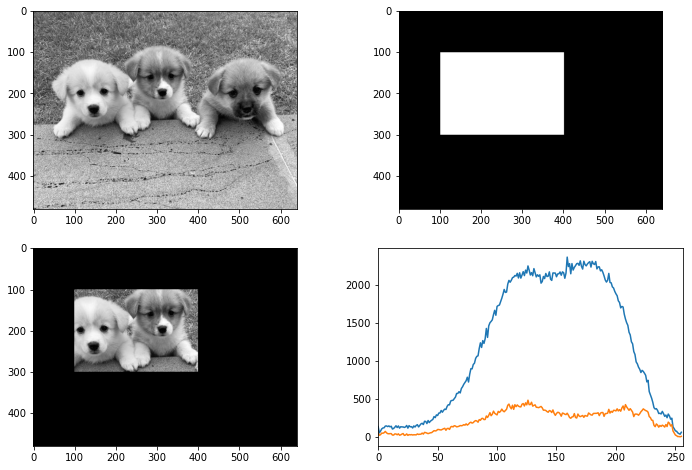

In [13]:
img = cv2.imread('dog.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255 #보고싶은 좌표 입력하여 영역보기
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()
#영역에 대한 히스토그램 구하기

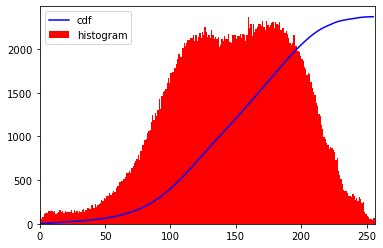

In [15]:
img = cv2.imread('dog.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#빨간색 히스토그램, cdf는 누적을해서,, 선의 마지막은 이미지 픽셀 갯수

In [16]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype("uint8")

In [17]:
img2 = cdf[img]

In [20]:
img = cv2.imread('dog.jpg', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))

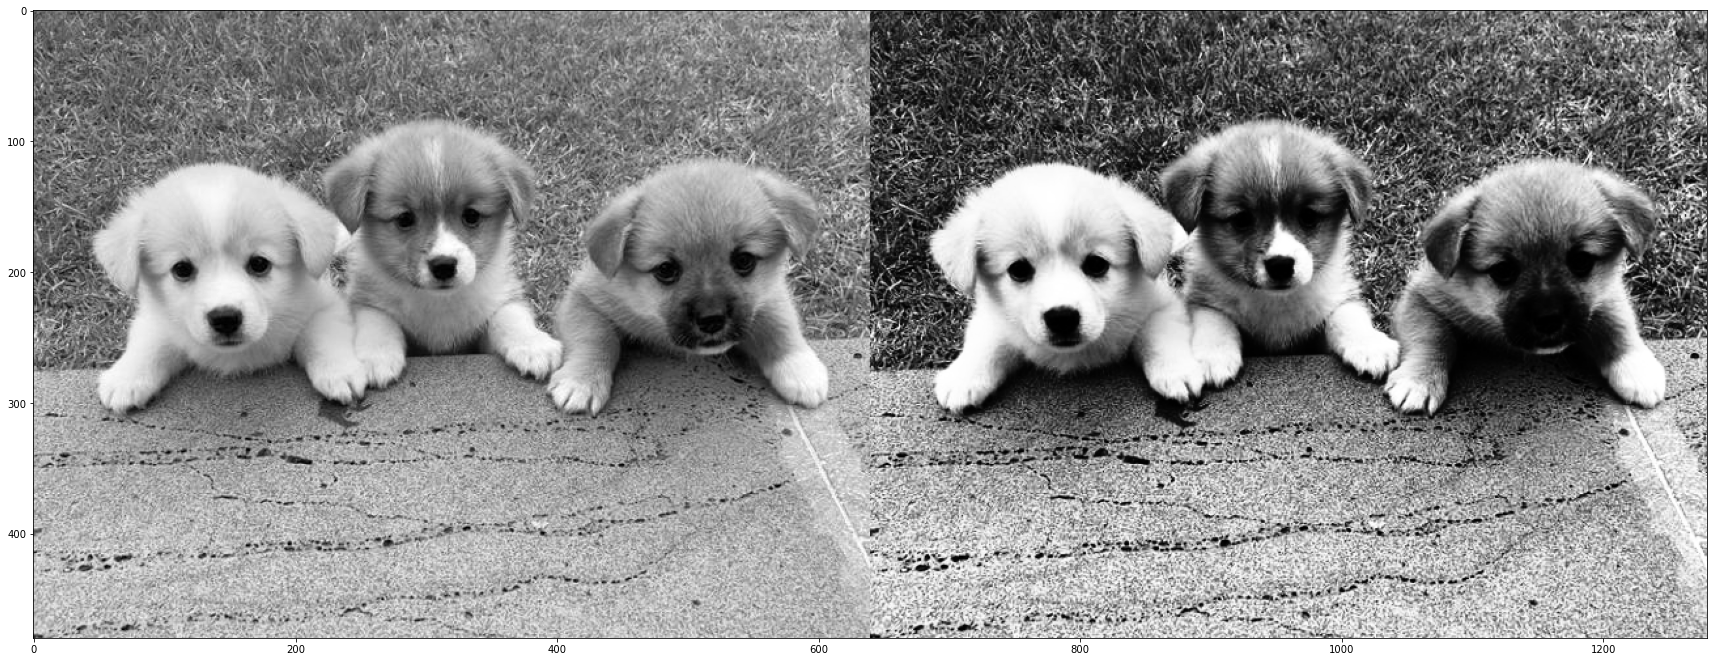

In [22]:
plt.figure(figsize = (30,45))
plt.imshow(res, "gray")
plt.show()